In [3]:
import pandas as pd

data = pd.read_csv('data/dict.txt', sep=" ", header = None)

In [358]:
data = pd.read_csv('data/rafwords.txt', header=None)

In [359]:
data.describe()

,0
count,370101
unique,370101
top,a
freq,1


In [360]:
histo = data[0].str.len().value_counts()

In [361]:
histo

9.0     53402
8.0     51627
10.0    45872
7.0     41998
11.0    37539
6.0     29874
12.0    29125
13.0    20944
5.0     15918
14.0    14149
15.0     8846
4.0      7185
16.0     5182
17.0     2967
3.0      2129
18.0     1471
19.0      760
2.0       427
20.0      359
21.0      168
22.0       74
23.0       31
1.0        26
24.0       12
25.0        8
27.0        3
28.0        2
29.0        2
31.0        1
Name: 0, dtype: int64

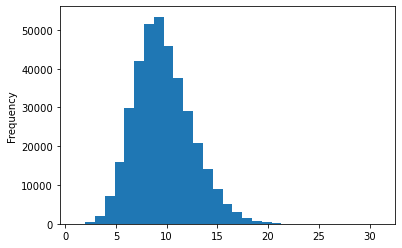

In [363]:
hist = data[0].str.len().plot.hist(bins=31)

In [364]:
data[0] = data[0].astype(str)

In [365]:
data[0]

0                    a
1                   aa
2                  aaa
3                  aah
4                aahed
              ...     
370098    zwinglianism
370099    zwinglianist
370100         zwitter
370101      zwitterion
370102    zwitterionic
Name: 0, Length: 370103, dtype: object

In [366]:
dato = data[0].str.len() == 5

In [367]:
dato

0         False
1         False
2         False
3         False
4          True
          ...  
370098    False
370099    False
370100    False
370101    False
370102    False
Name: 0, Length: 370103, dtype: bool

In [368]:
datt = data[dato]

In [369]:
datu = datt[0].apply(lambda x: x.isalpha())

In [370]:
dict5 = datt[datu]

In [371]:
dict5 = dict5[0].str.lower()

In [372]:
dict5.to_csv("dict5l.txt", index=None, header=False)

In [373]:
dict5

4         aahed
8         aalii
17        aargh
18        aaron
34        abaca
          ...  
370054    zowie
370064    zucco
370066    zudda
370080    zulus
370086    zunis
Name: 0, Length: 15918, dtype: object

In [374]:
dict50 = dict5.str[0]

In [375]:
dict50c = dict50.value_counts()

In [376]:
dict50c

s    1813
c    1196
a    1173
b    1141
t     981
p     944
m     849
d     801
g     737
f     684
r     681
l     679
h     571
k     473
w     468
e     421
n     405
o     334
u     328
i     301
v     287
j     260
y     167
z     112
q      85
x      27
Name: 0, dtype: int64

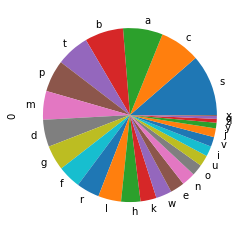

In [377]:
plot = dict50c.plot.pie()

In [378]:
dict51 = dict5.str[1]

In [379]:
dict51c = dict51.value_counts

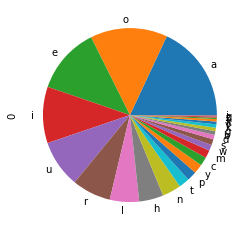

In [380]:
plot = dict51.value_counts().plot.pie()

In [381]:
dict52 = dict5.str[2]

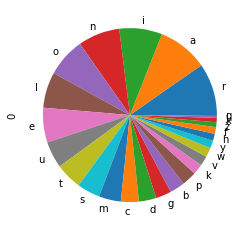

In [382]:
plot = dict52.value_counts().plot.pie()

In [383]:
dict53 = dict5.str[3]

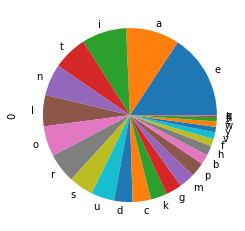

In [384]:
plot = dict53.value_counts().plot.pie()

In [385]:
dict54 = dict5.str[4]

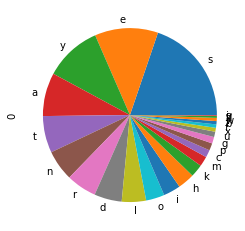

In [386]:
plot = dict54.value_counts().plot.pie()

In [409]:
dict54.value_counts()

s    3148
e    1873
y    1685
a    1282
t    1090
n     909
r     895
d     816
l     718
o     547
i     509
h     497
k     376
m     297
c     221
p     214
g     194
u     157
x     116
f     101
b      97
w      94
z      54
v      23
q       3
j       2
Name: 0, dtype: int64

Most frequent letters in a five-letter word:
- s, a, b, c, t, m, p
- a, o, e, i, u, r, l
- r, a, n, i, l, o, e
- e, a, i, n, t, l, o
- s, e, a, y, n, t, r


w_void is a set that contains letters that should not appear in the final answer.  At the begining, it should be empty.

In [351]:
w_void = {'i','d','e','l','b','o','u','c'}

w_poss is a list that contains letters that should be appear somewhere in the final answer.  At the beginning, it should be empty.

In [352]:
w_poss = ['a','t']

W_fixed is a list of known letters, with unknowns represented by '0'.  The initial value is all '0'.

In [402]:
w_fixed = ['0','r','0','f','0']

In [403]:
dict5

4         aahed
8         aalii
17        aargh
18        aaron
34        abaca
          ...  
370054    zowie
370064    zucco
370066    zudda
370080    zulus
370086    zunis
Name: 0, Length: 15918, dtype: object

In [404]:
dict5v = dict5.apply(lambda x: positions(x) & invalidletters(x) & mustletters(x))

In [405]:
dict5v

4         False
8         False
17        False
18        False
34        False
          ...  
370054    False
370064    False
370066    False
370080    False
370086    False
Name: 0, Length: 15918, dtype: bool

In [406]:
dict5vf = dict5[dict5v]

In [407]:
dict5vf

128600    graft
166218    kraft
Name: 0, dtype: object

In [268]:
def invalidletters(x):
    if ((x[0] not in w_void) & (x[1] not in w_void) & (x[2] not in w_void) & (x[3] not in w_void) & (x[4] not in w_void)):
        return True
    else:
        return False

In [269]:
def mustletters(x):
    haveit = True;
    for i in range(len(w_poss)):
        haveit = (haveit & (w_poss[i] in x))
    return haveit

In [397]:
def positions(x):
    sitwell = True;
    for i in range(len(w_fixed)):
        sitwell = sitwell & ((w_fixed[i]=='0') or (x[i]==w_fixed[i]))
    return sitwell